#### Calculating Daily SPI


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from matplotlib import patheffects
from scipy.stats._survival import EmpiricalDistributionFunction
from calendar import month_name
import spei as si  # si for standardized index

print(si.show_versions())

python: 3.13.5
spei: 0.8.2
numpy: 2.1.3
scipy: 1.15.3
matplotlib: 3.10.0
pandas: 2.2.3


In [2]:
# Read metadata
metadata = pd.read_excel('data/metadata_10%_79pos_2010-01-01.xlsx') 
metadata = metadata.set_index(['Pos Hujan ID'])
metadata

,Nama Stasiun,Balai,Provinsi,Kabupaten,Lintang,Bujur,Elevasi,ZOM
Pos Hujan ID,,,,,,,,
34010101a,BPP Temon,Region II,DI Yogyakarta,Kab. Kulon Progo,-7.89000,110.08000,0,273
34010201a,Beji,Region II,DI Yogyakarta,Kab. Kulon Progo,-7.87300,110.16200,0,273
34010202a,BPP Kulwaru,Region II,DI Yogyakarta,Kab. Kulon Progo,-7.89000,110.11700,0,273
34010301a,BPP Panjatan,Region II,DI Yogyakarta,Kab. Kulon Progo,-7.92308,110.15800,0,273
34010401a,PSDA Brosot,Region II,DI Yogyakarta,Kab. Kulon Progo,-7.95000,110.22400,0,273
...,...,...,...,...,...,...,...,...
34041504a,Tunggularum,Region II,DI Yogyakarta,Kab. Sleman,-7.59981,110.39375,748,269
34041601a,Pakem,Region II,DI Yogyakarta,Kab. Sleman,-7.67308,110.42014,0,269
34041701a,Bronggang,Region II,DI Yogyakarta,Kab. Sleman,-7.66086,110.44419,0,269


In [3]:
# Read daily precipitation data
data_daily = pd.read_excel('data/dailyprecip_10%_79pos_2010-01-01_imputed.xlsx') 
data_daily = data_daily.set_index(['DATA TIMESTAMP'])
data_daily

,34010101a,34010201a,34010202a,34010301a,34010401a,34010402a,34010501a,34010601a,34010701a,34010801a,...,34041303a,34041401a,34041501a,34041502a,34041504a,34041601a,34041701a,34041702a,34041704a,34021301a
DATA TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,58.0,57.0,49.1,25.0,22.0,24.8,36.6,0.0
2010-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,55.0,53.0,43.7,2.0,2.0,6.4,24.2,0.0
2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,17.0,16.9,0.0,1.0,3.2,10.2,0.0
2010-01-04,11.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,7.0,13.0,0.0,0.0,0.3,0.0,0.0,0.0,0.2,0.0
2010-01-05,8.0,0.0,12.0,11.0,30.0,30.0,30.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,35.0,17.6,29.0,31.5,23.0,21.5,23.0,13.0,11.1,18.0,...,24.0,21.5,9.0,11.5,9.0,10.5,10.0,4.5,5.5,16.0
2024-12-28,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0
2024-12-29,11.0,9.0,6.5,6.0,3.0,6.0,4.0,13.0,3.2,4.0,...,5.0,10.0,11.0,11.0,13.0,10.5,11.0,8.0,18.0,4.0


In [4]:
# Compute rolling precipitation totals for different time windows
# Each rolling window requires a minimum number of valid days equal to its length

rolled_10 = data_daily.rolling(10, min_periods=10).sum().dropna()
rolled_15 = data_daily.rolling(15, min_periods=15).sum().dropna()
rolled_20 = data_daily.rolling(20, min_periods=20).sum().dropna()
rolled_30 = data_daily.rolling(30, min_periods=30).sum().dropna()
rolled_60 = data_daily.rolling(60, min_periods=60).sum().dropna()
rolled_90 = data_daily.rolling(90, min_periods=90).sum().dropna()


In [5]:
calc_dist = pd.read_excel('data/fitdist/hasil_distribusi_optimal_complete.xlsx')
calc_dist = calc_dist.set_index(['Pos'])
calc_dist = calc_dist[calc_dist['Musim'] == 'AllSeason']    # filter musim AllSeason
calc_dist 

,BestDist,DeltaAIC_best,AIC_min,Distribusi_DeltaAIC_<2,Skala,Musim,DeltaAIC_gam,DeltaAIC_wei,DeltaAIC_gum,DeltaAIC_pe3,DeltaAIC_gev,DeltaAIC_llg,DeltaAIC_lgn,Lintang,Bujur
Pos,,,,,,,,,,,,,,,
34010101a,wei,0,126.927780,"['gam', 'wei', 'gum', 'gev']",10,AllSeason,0.262414,0.000000,0.358668,5.808277,0.564183,2.135515,4.205761,-7.89000,110.08000
34010201a,gum,0,119.806648,"['gam', 'wei', 'gum', 'gev']",10,AllSeason,0.917036,0.445392,0.035358,4.595307,0.000000,3.038599,5.684560,-7.87300,110.16200
34010202a,wei,0,128.779102,"['gam', 'wei', 'gum', 'gev']",10,AllSeason,0.524742,0.000000,1.661261,5.395414,0.874121,2.179641,4.093182,-7.89000,110.11700
34010301a,wei,0,122.218293,"['gam', 'wei', 'gum', 'gev']",10,AllSeason,0.270511,0.000000,0.499965,4.476715,0.897515,2.068485,3.837096,-7.92308,110.15800
34010401a,gum,0,117.392781,"['gam', 'wei', 'gum', 'gev']",10,AllSeason,0.864030,0.477371,0.000000,7.538663,0.176375,2.579814,4.896675,-7.95000,110.22400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34041504a,gam,0,212.007703,"['gam', 'wei', 'gum', 'pe3', 'gev']",90,AllSeason,0.548587,0.675421,1.108609,0.745880,0.000000,2.200764,2.388299,-7.59981,110.39375
34041601a,gam,0,202.131042,"['gam', 'wei', 'gum', 'pe3', 'gev', 'llg']",90,AllSeason,0.000000,0.297583,0.005552,0.773197,1.054967,1.773935,2.634292,-7.67308,110.42014
34041701a,wei,0,200.654798,"['gam', 'wei', 'gum', 'pe3', 'gev']",90,AllSeason,0.200999,0.000000,0.174951,0.138972,0.610704,2.181700,2.755183,-7.66086,110.44419


In [6]:
# Dictionary of rolling precipitation datasets for each aggregation window
# Keys = window size (days), Values = rolling-sum DataFrames
rolled_dict = {
    10: rolled_10,
    15: rolled_15,
    20: rolled_20,
    30: rolled_30,
    60: rolled_60,
    90: rolled_90,
}

# List of probability distributions to be fitted
# Each item is a tuple: ("short_name", scipy_distribution_object)
dist_list = [
    ("gam", scs.gamma),        # Gamma distribution
    ("wei", scs.weibull_min),  # Weibull distribution
    ("gum", scs.gumbel_r),     # Gumbel (right-skewed)
    ("pe3", scs.pearson3),     # Pearson Type III
    ("gev", scs.genextreme),   # Generalized Extreme Value
    ("llg", scs.fisk),         # Log-logistic
    ("lgn", scs.lognorm)       # Lognormal
]


In [ ]:
# Parallel processing SPI calculation with BestDist per station
from joblib import Parallel, delayed
import os

# Mapping distribution names to scipy.stats
dist_map = {
    "gam": scs.gamma,
    "wei": scs.weibull_min,
    "gum": scs.gumbel_r,
    "pe3": scs.pearson3,
    "gev": scs.genextreme,
    "llg": scs.fisk,
    "lgn": scs.lognorm,
}

# Create output folder
os.makedirs("data/dspi/result", exist_ok=True)

# Function to calculate SPI for one station and one time scale
def calc_spi_for_station(pos, dist_name, scale, rolled_dict):
    """Calculate SPI for one station and one time scale."""
    if dist_name not in dist_map:
        print(f"⚠ Unknown distribution {dist_name} for {pos}. Skipped.")
        return None

    if scale not in rolled_dict:
        print(f"⚠ Scale {scale} not found in rolled_dict. Skipped.")
        return None

    data_series = rolled_dict[scale].get(pos)
    if data_series is None or data_series.dropna().empty:
        print(f"⚠ No data for {pos} at scale {scale}. Skipped.")
        return None

    dist_scipy = dist_map[dist_name]

    try:
        fit_spi = si.spi(
            data_series,
            dist=dist_scipy,
            prob_zero=True,
            fit_freq="D"
        )
        return fit_spi
    except Exception as e:
        print(f"❌ Failed SPI for {pos} (scale {scale}, dist {dist_name}): {e}")
        return None

# Function to process all stations for a given scale
def process_scale(scale, calc_dict, rolled_dict):
    """Calculate SPI for all stations at a given scale."""
    print(f"\n--- Processing scale {scale}D ---")

    subset = calc_dict[calc_dict["Skala"] == scale]
    if subset.empty:
        print(f"⚠ No entries for scale {scale}. Skipped.")
        return None

    results = []

    for pos, rec in subset.iterrows():
        dist_name = rec["BestDist"]
        spi_series = calc_spi_for_station(pos, dist_name, scale, rolled_dict)
        if spi_series is not None:
            spi_series.name = pos
            results.append(spi_series)

    if not results:
        print(f"⚠ No SPI calculated for scale {scale}.")
        return None

    spi_df = pd.concat(results, axis=1)
    out_file = f"data/dspi/result/SPI_all_{scale}d.xlsx"
    spi_df.to_excel(out_file, sheet_name="SPI")
    print(f"✅ Saved {out_file} ({spi_df.shape[1]} stations)")

    return spi_df

# Main function to run SPI calculations in parallel
def run_spi_process(calc_dist, rolled_dict, n_jobs=6):
    """Run SPI calculation for all time scales in parallel."""
    all_scales = sorted(calc_dist["Skala"].unique())
    print(f"Detected time scales: {all_scales}")

    results = Parallel(n_jobs=n_jobs, verbose=10)(
        delayed(process_scale)(scale, calc_dist, rolled_dict)
        for scale in all_scales
    )

    print("\n--- All SPI calculations completed ---")
    return {scale: res for scale, res in zip(all_scales, results) if res is not None}


# Example usage:
# calc_dist: DataFrame with columns ['Skala', 'BestDist']
# rolled_dict: dict {scale: DataFrame of rolled sums}
# si.spi must be imported from spei

if __name__ == "__main__":
    spi_results = run_spi_process(calc_dist, rolled_dict, n_jobs=6)


#### SPI Interpolation


In [9]:
import pyproj

os.environ["PROJ_LIB"] = pyproj.datadir.get_data_dir()
print("PROJ_LIB set to:", os.environ["PROJ_LIB"])

PROJ_LIB set to: /opt/homebrew/anaconda3/lib/python3.13/site-packages/pyproj/proj_dir/share/proj


In [10]:
# Dictionary to store SPI results
spi_dict = {}

# List of SPI time scales
scales = [10, 15, 20, 30, 60, 90]
start_date = pd.Timestamp("2018-01-01")

for scale in scales:
    fname = f"data/dspi/result/SPI_all_{scale}d.xlsx"

    try:
        df = pd.read_excel(fname)

        # Use DATA TIMESTAMP as index if present
        if "DATA TIMESTAMP" in df.columns:
            df = df.set_index("DATA TIMESTAMP")

        # Convert index to datetime
        df.index = pd.to_datetime(df.index)

        # Filter data from 2018 onwards
        df = df[df.index >= start_date]

        spi_dict[scale] = df

    except FileNotFoundError:
        print(f"File not found: {fname}")


In [11]:
spi_dict[10]

,34010101a,34010201a,34010202a,34010301a,34010401a,34010402a,34010501a,34010601a,34010701a,34010801a,...,34041302a,34041303a,34041401a,34041501a,34041502a,34041504a,34041601a,34041701a,34041702a,34041704a
DATA TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.153525,-0.372335,0.235195,0.268784,-0.476106,0.741033,0.157907,-0.195205,-0.268654,-0.420186,...,-0.251242,0.413615,0.363552,-0.192192,-0.156527,-0.459517,-0.197567,0.460834,-1.053846,-0.960556
2018-01-02,-0.283651,-0.353568,0.157267,0.289258,-0.544000,0.617322,0.174772,-0.140541,-0.189977,-0.242123,...,-0.154524,0.710826,0.694459,-0.367744,-0.227610,-0.268744,0.126713,0.661988,-0.452963,-0.487457
2018-01-03,-0.339275,0.060350,-0.109700,0.216906,-0.479850,0.610369,0.198227,-0.171354,-0.200416,-0.129841,...,0.005506,0.693733,0.598061,0.069616,0.143359,0.694038,0.326080,0.649275,-0.361587,-0.095537
2018-01-04,-0.454342,0.115465,-0.009062,0.177048,-0.324910,0.696464,-0.026283,-0.768902,0.183250,-0.210526,...,0.837383,1.424543,1.532224,1.213304,1.400183,0.888893,0.815795,0.932393,-0.055411,0.141818
2018-01-05,-0.395489,0.211984,0.412710,0.516024,-0.313162,0.453187,-0.019745,-0.532535,0.199728,-0.179171,...,0.829328,1.402069,1.388472,1.321062,1.755857,0.897469,0.798292,0.969518,-0.062866,0.255915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,0.535715,1.349142,1.015554,1.313610,0.199903,0.384002,0.783213,1.021579,0.900605,0.854220,...,1.230306,1.245424,1.534424,0.532549,0.836907,0.483262,0.618825,1.495172,1.089693,0.201066
2024-12-28,0.381811,1.196228,0.846944,1.198339,0.047068,0.308681,0.675921,0.944665,0.734179,0.485387,...,0.724862,0.757783,0.794247,0.045857,0.361423,0.195136,-0.155112,1.008163,0.356123,-0.268237
2024-12-29,0.488168,1.249959,0.851613,1.248547,0.093203,0.415835,0.685449,0.946886,0.773767,0.468772,...,0.679735,0.751914,0.878731,0.097747,0.392013,0.339597,-0.123066,0.948686,0.413327,-0.161300


In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from shapely.geometry import Point
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from pyproj import Transformer
import matplotlib.ticker as mticker


def plot_spi(metadata_filtered, spi_dict, tanggal, scale=15, shpfile="ZOM9120_DIY.shp"):
    """
    Plot SPI values at rainfall station points for a given date.

    Parameters
    ----------
    metadata_filtered : DataFrame
        Contains ['Nama Stasiun', 'Bujur', 'Lintang'].
    spi_dict : dict
        Dictionary of SPI DataFrames by time scale {scale: DataFrame}.
        DataFrame index must be datetime and columns = station IDs.
    tanggal : str
        Date in format 'YYYY-MM-DD'.
    scale : int
        SPI time scale (e.g., 15, 20, 30, 60, 90).
    shpfile : str
        Path to boundary shapefile (ZOM, district boundary, etc.).
    """

    # Select SPI DataFrame for the requested scale
    if scale not in spi_dict:
        raise ValueError(f"Time scale {scale} is not available in spi_dict.")

    df_spi = spi_dict[scale]

    # Ensure datetime index
    if not isinstance(df_spi.index, pd.DatetimeIndex):
        df_spi.index = pd.to_datetime(df_spi.index)

    # Extract SPI values for the selected date
    try:
        spi_values = df_spi.loc[tanggal]
    except KeyError:
        raise ValueError(f"Date {tanggal} is not available in SPI scale {scale}.")

    # Join SPI values with station metadata
    metadata = metadata_filtered.copy()
    metadata[f"SPI_{scale}d"] = spi_values.values

    # Build GeoDataFrame for station points
    geometry = [Point(xy) for xy in zip(metadata["Bujur"], metadata["Lintang"])]
    stasiun_gdf = gpd.GeoDataFrame(metadata, geometry=geometry, crs="EPSG:4326")

    # Load boundary shapefile
    batas_gdf = gpd.read_file(shpfile)

    # Reproject both layers to Web Mercator for basemap support
    stasiun_gdf = stasiun_gdf.to_crs(epsg=3857)
    batas_gdf = batas_gdf.to_crs(epsg=3857)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Plot boundary polygons
    batas_gdf.plot(
        ax=ax,
        facecolor="none",
        edgecolor="black",
        linestyle="--",
        linewidth=1.0
    )

    # Color scale for SPI (default range -3 to +3)
    cmap = cm.RdYlGn
    norm = mcolors.Normalize(vmin=-3, vmax=3)

    # Plot station points
    stasiun_gdf.plot(
        ax=ax,
        column=f"SPI_{scale}d",
        cmap=cmap,
        markersize=40,
        legend=False
    )

    # Manual colorbar configuration
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(
        sm,
        ax=ax,
        orientation="horizontal",
        shrink=0.7,
        pad=0.05
    )
    cbar.set_label(f"SPI {scale}-day")

    # Add basemap
    ctx.add_basemap(
        ax,
        source=ctx.providers.OpenTopoMap,
        crs=stasiun_gdf.crs,
        zoom=11,
        alpha=0.7
    )

    # Coordinate formatter (convert Web Mercator back to lat/lon)
    transformer = Transformer.from_crs("epsg:3857", "epsg:4326", always_xy=True)

    def format_lon(x, pos):
        lon, _ = transformer.transform(x, ax.get_ylim()[0])
        return f"{lon:.1f}°E"

    def format_lat(y, pos):
        _, lat = transformer.transform(ax.get_xlim()[0], y)
        return f"{lat:.1f}°S"

    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_lon))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_lat))

    # Add scale bar
    scalebar = ScaleBar(
        dx=1,
        units="m",
        dimension="si-length",
        location="lower left",
        length_fraction=0.1,
        scale_loc="bottom",
        box_alpha=0.5
    )
    ax.add_artist(scalebar)

    # Add north arrow
    ax.annotate(
        "",
        xy=(0.97, 0.96),
        xytext=(0.97, 0.90),
        arrowprops=dict(facecolor="black", width=2, headwidth=8),
        xycoords="axes fraction"
    )
    ax.text(
        0.97, 0.975, "N",
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold"
    )

    # Title
    ax.set_title(f"SPI {scale}-day — {tanggal}", fontsize=14)

    plt.tight_layout()
    plt.show()


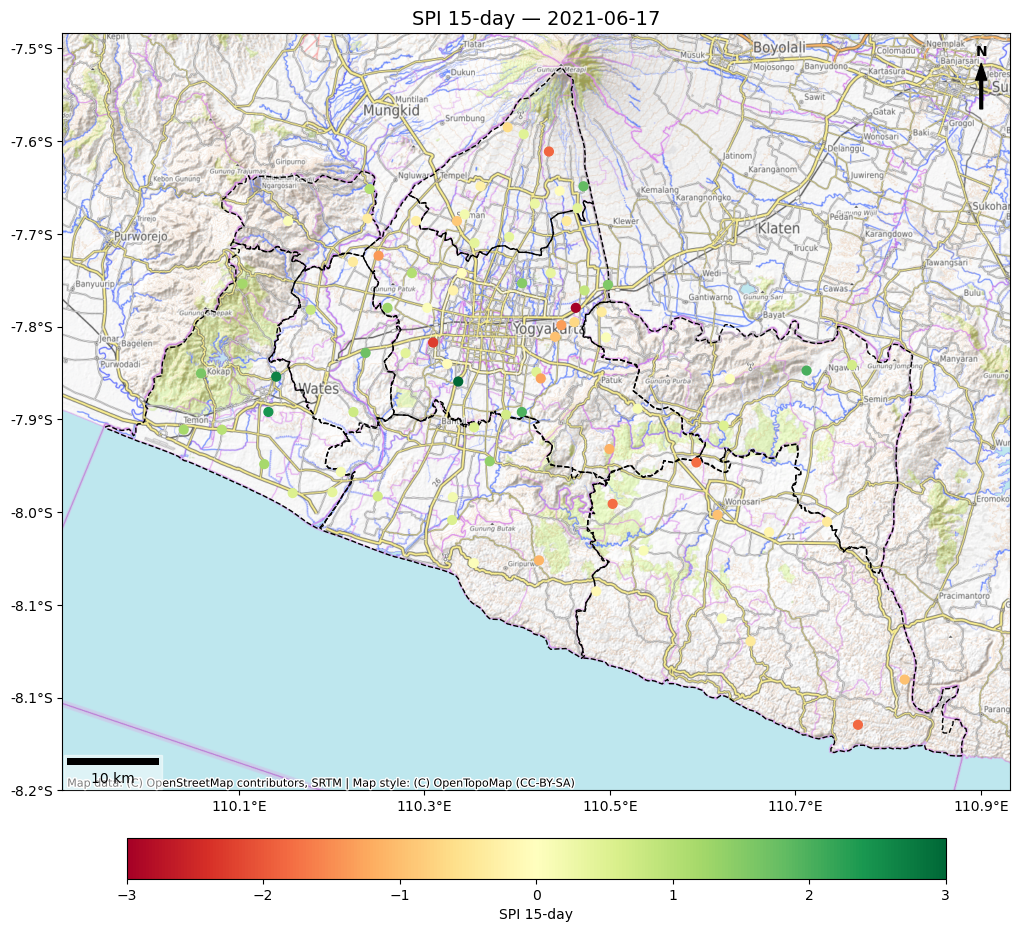

In [13]:
plot_spi(metadata, spi_dict, tanggal="2021-06-17", scale=15, shpfile="ZOM9120_DIY.shp")


In [14]:
# parallel processing
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
from datetime import datetime
from joblib import Parallel, delayed


# IDW interpolation
def idw_interpolation(x, y, z, xi, yi, power=2, k=6):
    """Inverse Distance Weighting (IDW) with k-nearest neighbors."""
    points = np.vstack((x, y)).T
    tree = cKDTree(points)
    grid_points = np.vstack((xi.ravel(), yi.ravel())).T

    dists, idxs = tree.query(grid_points, k=k)

    # Ensure 2D arrays for weights
    if k == 1:
        dists = dists[:, None]
        idxs = idxs[:, None]

    # Avoid division by zero
    with np.errstate(divide='ignore'):
        weights = 1.0 / (dists ** power)
    weights[dists == 0] = 1e12

    weights_sum = weights.sum(axis=1)
    weights_sum[weights_sum == 0] = np.nan
    weights = weights / weights_sum[:, None]

    zi = np.sum(z[idxs] * weights, axis=1)
    return zi.reshape(xi.shape)


# Aggregate interpolated IDW results to subdistrict polygons
def spi_from_idw_to_kecamatan(xi, yi, zi, sawah_gdf, col_kec, method="p10"):
    """
    Aggregate interpolated grid values (zi) to polygon units (kecamatan).
    Returns DataFrame with columns [col_kec, 'spi'] for each polygon containing points.
    """
    xs = xi.ravel()
    ys = yi.ravel()
    vals = zi.ravel()

    pts = [Point(xx, yy) for xx, yy in zip(xs, ys)]
    gdf_points = gpd.GeoDataFrame({"spi": vals}, geometry=pts, crs=sawah_gdf.crs)

    gdf_points = gdf_points.dropna(subset=["spi"])
    if gdf_points.empty:
        return pd.DataFrame(columns=[col_kec, "spi"])

    joined = gpd.sjoin(
        gdf_points,
        sawah_gdf[[col_kec, "geometry"]],
        how="inner",
        predicate="within",
        rsuffix="poly"
    )

    if joined.empty:
        return pd.DataFrame(columns=[col_kec, "spi"])

    if method == "mean":
        out = joined.groupby(col_kec)["spi"].mean().reset_index()
    elif method == "p5":
        out = joined.groupby(col_kec)["spi"].quantile(0.05).reset_index()
    elif method == "p10":
        out = joined.groupby(col_kec)["spi"].quantile(0.10).reset_index()
    elif method == "p20":
        out = joined.groupby(col_kec)["spi"].median().reset_index()
    elif method == "p25":
        out = joined.groupby(col_kec)["spi"].median().reset_index()
    elif method == "min":
        out = joined.groupby(col_kec)["spi"].min().reset_index()
    elif method == "median":
        out = joined.groupby(col_kec)["spi"].median().reset_index()
    else:
        raise ValueError("method must be 'mean','median','p5','p10','p20','p25', or 'min'")

    return out


# Worker function for one date
def process_one_date(tanggal, i, df_spi, x, y, xi, yi, sawah, col_kec, scale,
                     power=2, k=12, method="p10"):
    """
    Process SPI interpolation and polygon aggregation for one date.
    """
    try:
        z = df_spi.loc[tanggal].values.astype(float)
    except Exception as e:
        print(f"Skipping {tanggal}: {e}")
        return pd.DataFrame(columns=[col_kec, "spi", "date"])

    zi = idw_interpolation(x, y, z, xi, yi, power=power, k=k)

    spi_kec = spi_from_idw_to_kecamatan(xi, yi, zi, sawah, col_kec, method=method)
    if spi_kec.empty:
        spi_kec = pd.DataFrame(columns=[col_kec, "spi"])

    spi_kec["date"] = pd.to_datetime(tanggal)

    print(f"[{scale}-day][{method}] Done {pd.to_datetime(tanggal).strftime('%Y-%m-%d')} ({i}/{len(df_spi)})")
    return spi_kec


# Main parallel processing function for all scales
def process_spi_to_kecamatan(spi_dict, metadata, sawah_shp, col_kec="WADMKC",
                             scales=[10,15,20,30,60,90], methods=["p20"], target_res=250,
                             power=2, k=12, n_jobs=6,
                             outdir="data/dspi/result"):
    """
    Parallel IDW interpolation and polygon aggregation for SPI data.
    Produces timeseries and summary statistics for each subdistrict.
    """

    os.makedirs(outdir, exist_ok=True)

    # Read polygons and convert to metric CRS
    sawah = gpd.read_file(sawah_shp).to_crs(epsg=3857)
    minx, miny, maxx, maxy = sawah.total_bounds

    width, height = maxx - minx, maxy - miny
    nx = int(np.ceil(width / target_res)) + 1
    ny = int(np.ceil(height / target_res)) + 1

    xi = np.linspace(minx, maxx, nx)
    yi = np.linspace(miny, maxy, ny)
    xi, yi = np.meshgrid(xi, yi)

    # Convert station coordinates to same CRS
    gdf_stns = gpd.GeoDataFrame(
        metadata,
        geometry=gpd.points_from_xy(metadata["Bujur"], metadata["Lintang"]),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)

    x = gdf_stns.geometry.x.values
    y = gdf_stns.geometry.y.values

    # Loop through selected SPI scales
    for scale in scales:
        df_spi = spi_dict[scale].copy()
        print(f"\nProcessing SPI {scale}-day with {n_jobs} parallel jobs (methods: {methods})")

        # Loop through aggregation methods
        for method in methods:
            print(f"Method: {method}")

            results = Parallel(n_jobs=n_jobs, backend="loky", verbose=5)(
                delayed(process_one_date)(
                    tanggal, i, df_spi, x, y, xi, yi, sawah, col_kec, scale,
                    power, k, method
                )
                for i, tanggal in enumerate(df_spi.index, 1)
            )

            if len(results) == 0:
                print(f"No results for scale {scale}, method {method}")
                continue

            combined = pd.concat(results, ignore_index=True)
            if combined.empty:
                print(f"Combined result empty for scale {scale}, method {method}")
                continue

            # Pivot to timeseries format
            out_df = combined.pivot_table(
                index="date",
                columns=col_kec,
                values="spi",
                aggfunc="first"
            )

            out_df.index = pd.to_datetime(out_df.index)
            out_df = out_df.sort_index()

            # Summary statistics
            summary = pd.DataFrame({
                "p5": out_df.quantile(0.05, axis=0),
                "p10": out_df.quantile(0.10, axis=0),
                "mean": out_df.mean(axis=0),
                "median": out_df.median(axis=0),
                "min": out_df.min(axis=0)
            })

            fname = os.path.join(outdir, f"SPI_{scale}_rainfed_{method}.xlsx")
            with pd.ExcelWriter(fname, engine="openpyxl") as writer:
                out_df.to_excel(writer, sheet_name="timeseries")
                summary.to_excel(writer, sheet_name="summary")

            print(f"Saved {fname} (timeseries + summary)")

    print("\nFinished all scales and methods")


In [ ]:
process_spi_to_kecamatan(
    spi_dict=spi_dict,                             # Dictionary containing SPI DataFrames for each time scale
    metadata=metadata,                             # Station metadata DataFrame (index = station IDs, columns = Lintang/Bujur)
    sawah_shp="data/shp/sawah_tadah_hujan_kecamatan.shp",   # Path to polygon shapefile for subdistrict-level rainfed rice fields
    col_kec="WADMKC",                              # Column name in shapefile representing the subdistrict identifier
    n_jobs=6                                       # Number of CPU cores to use for parallel processing
)


In [16]:
# Dictionary to store loaded SPI rainfall-runoff (tadah hujan) datasets
spi_dict = {}

# List of SPI time scales to load
scales = [10, 15, 20, 30, 60, 90]

# Optional cutoff date for filtering (disabled by default)
# start_date = pd.to_datetime("2018-01-01")

for scale in scales:
    fname = f"data/dspi/result/SPI_{scale}_rainfed_p20.xlsx"
    try:
        # Read Excel file for the given SPI scale
        df = pd.read_excel(fname)

        # Ensure the 'date' column becomes the index
        if "date" in df.columns:
            df = df.set_index("date")

        # Convert index to datetime type
        df.index = pd.to_datetime(df.index)

        # Optional date filtering (disabled)
        # df = df.loc[df.index >= start_date]

        # Round all SPI values to 3 decimal places
        df = df.round(3)

        # Store the DataFrame in a dictionary
        spi_dict[scale] = df

        # Save the rounded version to a new Excel file
        out_fname = f"data/dspi/result/SPI_{scale}_rainfed_p20_rounded.xlsx"
        df.to_excel(out_fname)

        print(f"Saved {out_fname} with {len(df)} records")

    except FileNotFoundError:
        print(f"File not found: {fname}")


Saved data/dspi/result/SPI_10_rainfed_p20_rounded.xlsx with 2557 records
Saved data/dspi/result/SPI_15_rainfed_p20_rounded.xlsx with 2557 records
Saved data/dspi/result/SPI_20_rainfed_p20_rounded.xlsx with 2557 records
Saved data/dspi/result/SPI_30_rainfed_p20_rounded.xlsx with 2557 records
Saved data/dspi/result/SPI_60_rainfed_p20_rounded.xlsx with 2557 records
Saved data/dspi/result/SPI_90_rainfed_p20_rounded.xlsx with 2557 records
